In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import random
import platform

In [2]:
def os_setting():
    if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
    elif platform.system() == 'Windows': #윈도우
            plt.rc('font', family='Malgun Gothic') 
    elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
            #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
            #!mv malgun.ttf /usr/share/fonts/truetype/
            #import matplotlib.font_manager as fm 
            #fm._rebuild() 
            plt.rc('font', family='Malgun Gothic') 
    plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
    
os_setting()

In [3]:
path = "D:/shin/data/welfare/"
fig_path = 'D:/shin/최종 소스코드 및 데이터/fig/'
data = pd.read_csv(path + '출산전후휴가급여_산업별.csv', encoding='cp949', header = [0,1])

In [4]:
data.iloc[0:, 1:] = data.iloc[0:, 1:].apply(pd.to_numeric)
pd.options.display.float_format = '{:.0f}'.format

#### 1인당 출산전후 휴가 급여 계산

In [5]:
price_list = list()

for i in range(1, len(data.columns), 2):
    year = data.columns[i][0]
    price = data[year,'수급금액 (원)']/data[year,'수급자 (명)']
    price = price.values.tolist()
    price_list.append(price)

In [6]:
price_df = pd.DataFrame(np.transpose(price_list), 
                        columns=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
                       index = data['산업별(1)'].values.flatten().tolist())
price_df = price_df.fillna(0)
year_standard = price_df.T

In [7]:
year_standard

,계,a. 농업임업어업,b. 광업,c. 제조업,d. 전기 가스 증기 및 수도사업,e. 하수·폐기물 처리 원료재생 및 환경복원업,f. 건설업,g. 도매 및 소매업,h. 운수업,i. 숙박 및 음식점업,...,k. 부동산업 및 임대업,l. 전문 과학 및 기술 서비스업,m. 사업시설관리 및 사업지원 서비스업,n. 공공행정 국방 및 사회보장 행정,o. 교육 서비스업,p. 보건업 및 사회복지 서비스업,q. 예술 스포츠 및 여가관련 서비스업,r. 협회 및 단체 수리 및 기타 개인 서비스업,s. 가구내 고용활동 및 달리 분류되지 않은 자가소비 생산활동,t. 국제 및 외국기관
2010,2542368,2978394,2721650,2379296,1444617,2963786,3238906,2805214,2397879,2001884,...,2852149,3186430,2251842,1364847,2450139,2797061,2034203,2797712,3512524,1998060
2011,2579632,2820834,2851772,2460411,1472173,2895028,3278378,2860042,2500947,2136859,...,3010273,3205991,2114858,1440276,2469899,2868122,2113835,2794008,3369382,2050550
2012,2590102,2955151,2369038,2457006,1445544,3034640,3260815,2891438,2550398,2094513,...,2774088,3262417,2101597,1495040,2377644,2927953,2259892,2832931,3225615,1761921
2013,2597644,2812926,2238540,2450841,1459251,3105296,3303511,2919509,2530187,2095372,...,2842819,3250788,2147321,1413066,2049255,3012679,2276223,2950540,3991320,1656292
2014,2668496,2912059,3314350,2507272,1468674,3417914,3316986,2937567,2661074,2131276,...,2820467,3305424,2301800,1379427,2076870,3074045,2456830,2981480,0,1655246
2015,2719019,3019872,3295000,2527726,1536807,3236962,3355810,3033888,2619677,2121425,...,2995056,3374444,2442209,1399729,2038203,3157655,2500365,3181450,1860453,3012500
2016,2741707,3273195,4267170,2533328,1453490,3531269,3395209,3007108,2630918,2166442,...,3062999,3387054,2500403,1407490,2032048,3254497,2483528,3097383,0,1790977
2017,2978828,3378735,2219375,2742838,1620707,3611691,3652256,3247986,2776891,2362968,...,3367943,3673178,2782208,1511540,2297742,3595984,2723280,3349587,0,1825762
2018,3235447,3438252,5181458,2991243,1699917,3797261,4015336,3516960,2931799,2517928,...,3513923,3956997,2963150,1623224,2521236,3898268,3061325,3630854,2328849,1825762
2019,3639733,3790964,4932037,3421614,1893528,3905176,4404773,3942551,3299835,2836407,...,3968591,4346055,3262776,1804170,2821106,4286398,3419720,3935898,0,2350565


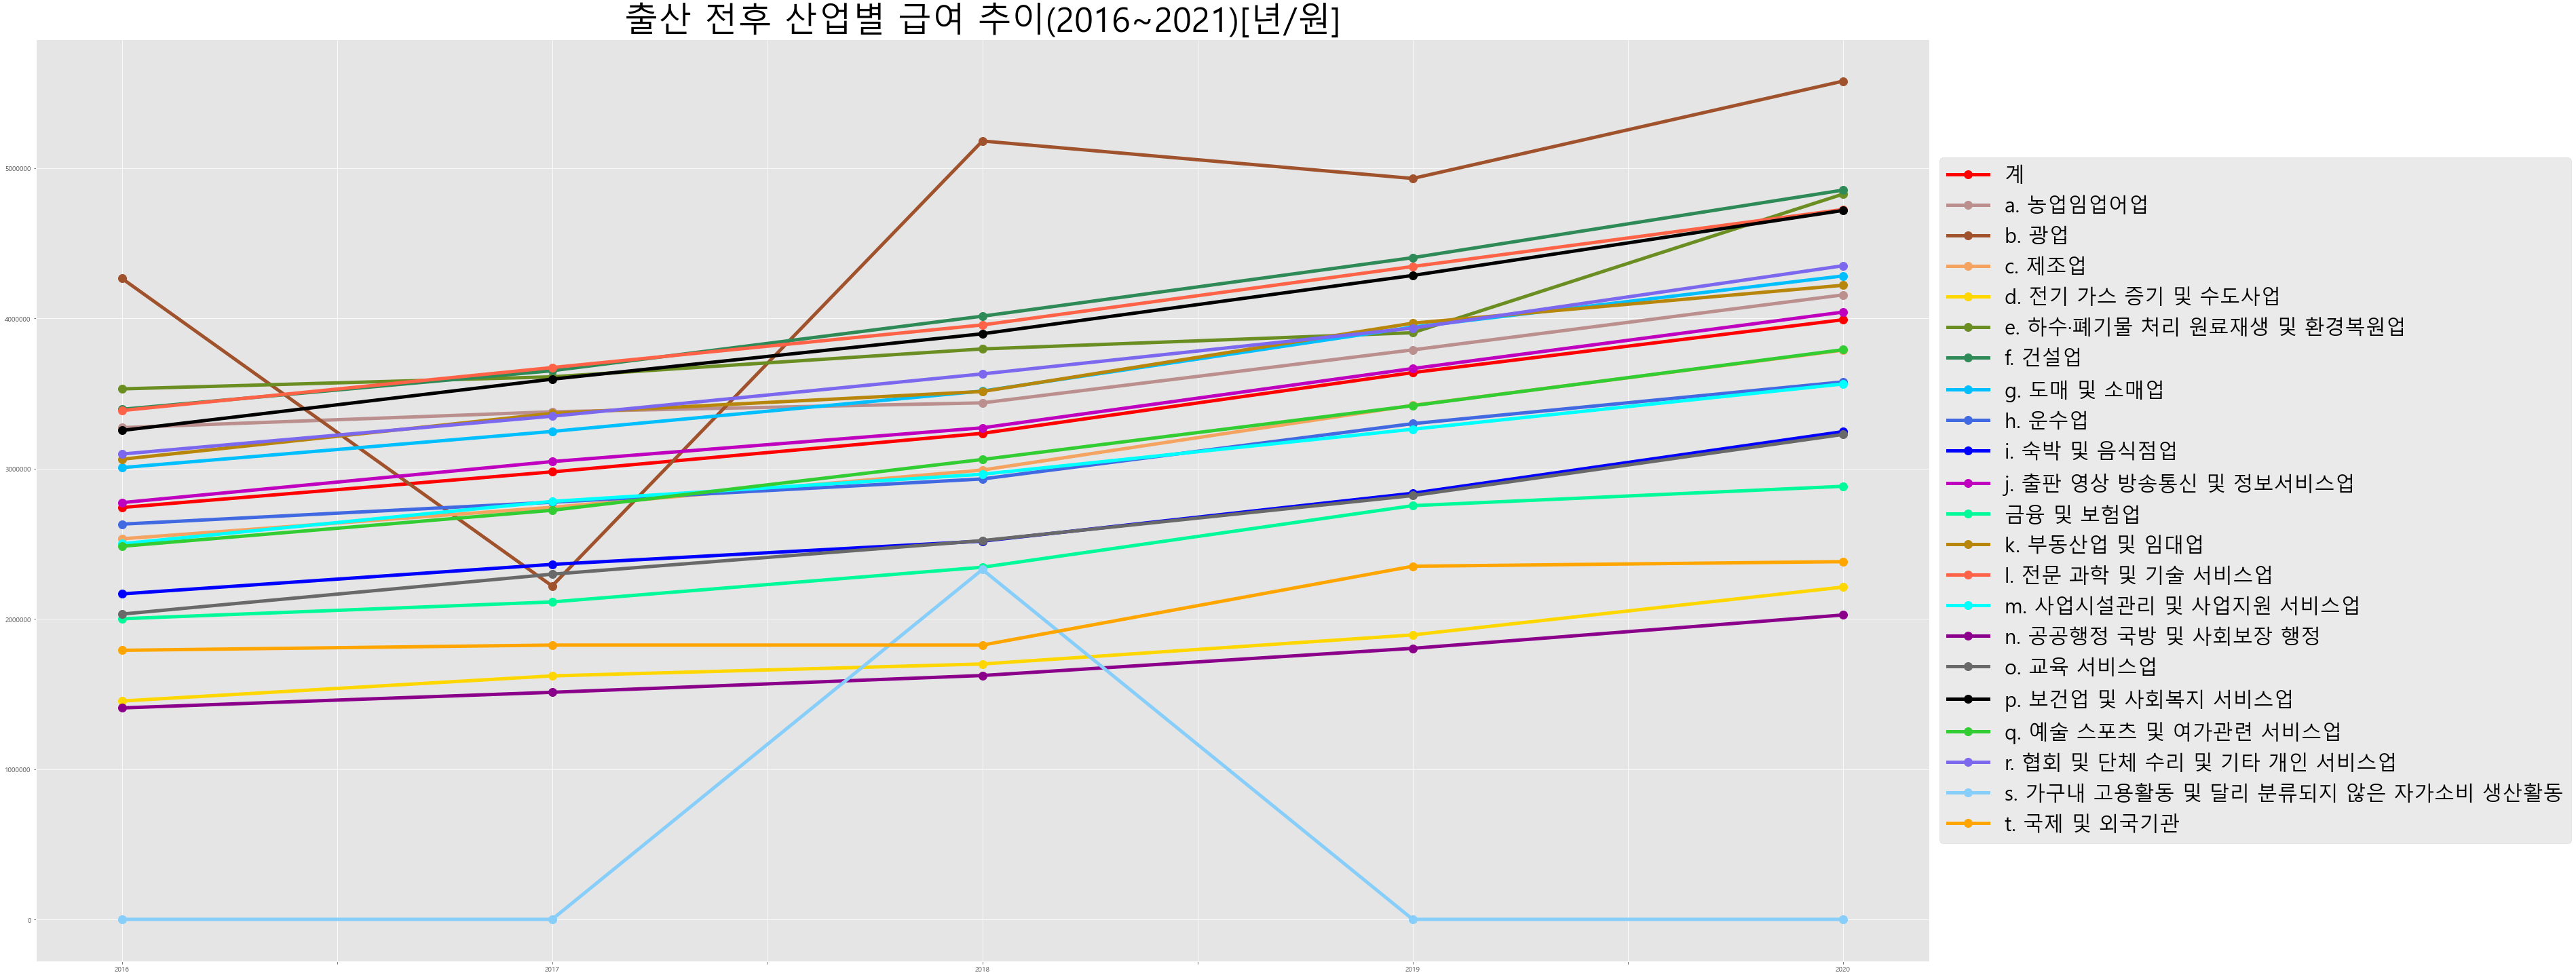

In [8]:
color =['r', 'rosybrown', 'sienna', 'sandybrown', 'gold', 'olivedrab', 'seagreen',
            'deepskyblue', 'royalblue', 'blue', 'm', 'mediumspringgreen', 'darkgoldenrod',
           'tomato', 'aqua', 'darkmagenta', 'dimgray', 'black', 'limegreen',
           'mediumslateblue', 'lightskyblue', 'orange']

ax = year_standard.iloc[6:,:].plot(figsize=(50,25), 
                                   color = color, linewidth='5', marker='o', markersize=12)

ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.rc('font', size=25) 
plt.rc('axes', labelsize=50)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=50)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=30)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.title('출산 전후 산업별 급여 추이(2016~2021)[년/원]', size = 50)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(fig_path + '출산 전후 산업별 급여 추이(2016~2020,원).png')